### 딥-러닝 과정 Mulit Layer Perceptron(MLP) | 2020.02.26. 

## 세번째 실습. Keras 모델 생성/학습 - 당뇨병 예측 모델

In [1]:
# 1. Pandas 가져오기
!pip install pandas
import pandas as pd
print(pd.__version__)

You should consider upgrading via the 'pip install --upgrade pip' command.
0.25.3


In [2]:
# 2. 데이터 불러오기
data = pd.read_csv("diabetes_data.csv")
data.head()

,pregnant,gloucose,blood pressure,skin thickness,insulin,BMI,DPF,age,result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant          768 non-null int64
gloucose          768 non-null int64
blood pressure    768 non-null int64
skin thickness    768 non-null int64
insulin           768 non-null int64
BMI               768 non-null float64
DPF               768 non-null float64
age               768 non-null int64
result            768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,pregnant,gloucose,blood pressure,skin thickness,insulin,BMI,DPF,age,result
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# 3. X/y 나누기
#X = data.loc[:,['pregnant', 'gloucose', 'blood pressure', 'skin thickness', 'insulin', 'BMI', 'DPF', 'age']]
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [6]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [7]:
# 4. Train set, Test set 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 9)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=5)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(537, 8)
(116, 8)
(115, 8)
(537,)
(116,)
(115,)


In [9]:
# 5. Keras 패키지 가져오기
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

print(keras.__version__)

Using TensorFlow backend.


2.3.1


In [21]:
# 6. MLP 모델 생성
model = Sequential()
model.add(Dense(16 , input_dim =8 , activation='relu'))
model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_11 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 9         
Total params: 1,361
Trainable params: 1,361
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
#!pip install GraphViz
#!pip install pydot

#from keras.utils.vis_utils import plot_model
#plot_model(model, show_shapes = True, show_layer_names = True)

In [22]:
# 7. Compile - Optimizer, Loss function 설정
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
# 8. 학습시키기

from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, batch_size=8, nb_epoch = 200, validation_data=(X_val, y_val), verbose=1, callbacks=[early_stop])

Train on 537 samples, validate on 115 samples
Epoch 1/200
416/537 [======================>.......] - ETA: 0s - loss: 0.6065 - accuracy: 0.6779

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


537/537 [==============================] - 0s 419us/step - loss: 0.6155 - accuracy: 0.6704 - val_loss: 0.6124 - val_accuracy: 0.6609
Epoch 2/200
537/537 [==============================] - 0s 420us/step - loss: 0.6184 - accuracy: 0.6723 - val_loss: 0.6562 - val_accuracy: 0.6348
Epoch 3/200
537/537 [==============================] - 0s 419us/step - loss: 0.6230 - accuracy: 0.6462 - val_loss: 0.6045 - val_accuracy: 0.6609
Epoch 4/200
537/537 [==============================] - 0s 419us/step - loss: 0.5992 - accuracy: 0.6741 - val_loss: 0.6257 - val_accuracy: 0.6435
Epoch 5/200
537/537 [==============================] - 0s 420us/step - loss: 0.5952 - accuracy: 0.7039 - val_loss: 0.6224 - val_accuracy: 0.6348
Epoch 6/200
537/537 [==============================] - 0s 420us/step - loss: 0.5876 - accuracy: 0.6909 - val_loss: 0.6373 - val_accuracy: 0.6261
Epoch 7/200
537/537 [==============================] - 0s 419us/step - loss: 0.6067 - accuracy: 0.6778 - val_loss: 0.5880 - val_accuracy: 0.66

In [19]:
# 9. 모델 평가하기
train_acc = model.evaluate(X_train, y_train)
test_acc = model.evaluate(X_test, y_test)

print('train_acc: ', train_acc)
print('test_acc: ', test_acc)

116/116 [==============================] - 0s 42us/step
train_acc:  [0.44362243671435, 0.7802606821060181]
test_acc:  [0.6066597679565693, 0.7241379022598267]


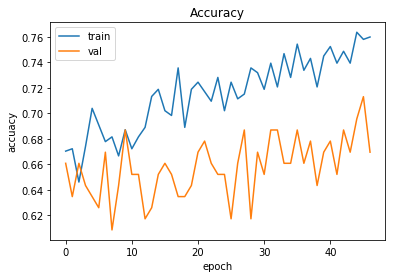

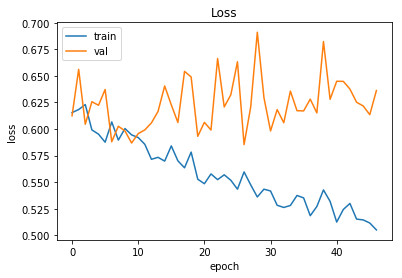

In [25]:
# 10. 학습 시각화하기
#!pip install matplotlib

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.ylabel('accuacy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

In [26]:
# 11 모델 저장

model_path = 'diabet_model.h5'
model.save(model_path)

In [27]:
# 12 모델 불러이고

from keras.models import load_model

loaded_model = load_model(model_path)

In [29]:
print(loaded_model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_11 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 9         
Total params: 1,361
Trainable params: 1,361
Non-trainable params: 0
_________________________________________________________________
None
